<a href="https://colab.research.google.com/github/GajAhmadaaa/NanamYuk-ML/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City Based Weather Analysis

In [1]:
# importing the required libraries
import requests
# Enter the api key of openweathermap here
api_key = "81c713c1b0fea513c62681c97920daa9"
# Base url for the open map api
root_url = "http://api.openweathermap.org/data/2.5/weather?"
# Input the City name for which we need the weather data
city_name = input("Please Enter The City Name : ")
# Building the final url for the API call
url = f"{root_url}appid={api_key}&q={city_name}"
# sending a get request at the url
r = requests.get(url)
# storing the returned json data into a variable
data = r.json()
# Checking If there is no error and the status code is 200
if data['cod'] == 200:
    # getting the temperature from the json data
    temp = data['main']['temp'] - 273.15
    # getting the pressure from the json data
    pressure = data['main']['pressure']
    # getting the humidity from the json data
    humidity = data['main']['humidity']
    # getting the description from the json data
    descr = data['weather'][0]['description']
    # getting the wind speed from the json data
    wind = data['wind']['speed']
    # Displaying all the data
    print(f"City Name : {city_name}")
    print(f"The Weather Condition is {descr}")
    print(f"The temperature is {temp :.2f} Celsius")
    print(f"The pressure is {pressure}hPa")
    print(f"The humidity is {humidity}%")
    print(f"The speed of wind is {wind}m/s")
    print(url)
else:
    # If any error occured then print this
    print("Something Went Wrong")

Please Enter The City Name : Jakarta
City Name : Jakarta
The Weather Condition is heavy intensity rain
The temperature is 22.96 Celsius
The pressure is 1010hPa
The humidity is 83%
The speed of wind is 1.51m/s
http://api.openweathermap.org/data/2.5/weather?appid=81c713c1b0fea513c62681c97920daa9&q=Jakarta


## Improved City Based Weather Analysis but just avg Temp within month

In [2]:
import requests
from datetime import datetime
today = datetime.today()

api_key = "81c713c1b0fea513c62681c97920daa9"

root_url = "https://history.openweathermap.org/data/2.5/aggregated/month?"

city_name = input("Please Enter The City Name : ")

url = f"{root_url}month={today.month}&q={city_name},ID&appid={api_key}"

r = requests.get(url)

data = r.json()
# Checking If there is no error and the status code is 200
if data['cod'] == 200:
    # getting the temperature from the json data
    temp = data['result']['temp']['mean'] - 273.15
    # getting the humidity from the json data
    humidity = data['result']['humidity']['mean']
    # getting the month from the json data
    month = data['result']['month']
    print(f"City Name : {city_name}")
    print(f"The avg temperature in month {month} is {temp :.2f} Celsius")
    print(f"The avg humidity in month {month} is {humidity :.2f} %")
    print(url)
else:
    message = data['message']
    print("Something Went Wrong,", message)

Please Enter The City Name : Jakarta
City Name : Jakarta
The avg temperature in month 5 is 28.63 Celsius
The avg humidity in month 5 is 77.34 %
https://history.openweathermap.org/data/2.5/aggregated/month?month=5&q=Jakarta,ID&appid=81c713c1b0fea513c62681c97920daa9


## Error handling with try except for location that has no weather history data

In [3]:
import requests
from datetime import datetime
today = datetime.today()

api_key = "81c713c1b0fea513c62681c97920daa9"
city_name = input("Please Enter The City Name : ")

###########################################################################
# Bisa dijadikan Method #
root_url = "https://history.openweathermap.org/data/2.5/aggregated/month?"
url = f"{root_url}month={today.month}&q={city_name},ID&appid={api_key}"
r = requests.get(url)
data = r.json()

root_url2 = "https://api.openweathermap.org/data/2.5/weather?"
url2 = f"{root_url2}q={city_name}&appid={api_key}"
r2 = requests.get(url2)
data2 = r2.json()
############################################################################

# Checking If there is no error and the status code is 200
try:
  if data['cod'] == 200:
      # getting the temperature from the json data
      temp = data['result']['temp']['mean'] - 273.15
      # getting the humidity from the json data
      humidity = data['result']['humidity']['mean']
      # getting the month from the json data
      month = data['result']['month']
      print(f"City Name : {city_name}")
      print(f"The avg temperature in month {month} is {temp :.2f} Celsius")
      print(f"The avg humidity in month {month} is {humidity :.2f} %")
      print(url)
  else:
      message = data['message']
      print("Something Went Wrong,", message)
except:
  if data['code'] == 404000:
    message = data['message']
    print(f"Error, {message}. Switching to current weather....")
    # getting the temperature from the json data
    temp = data2['main']['temp'] - 273.15
    # getting the humidity from the json data
    humidity = data2['main']['humidity']
    print(f"City Name : {city_name}")
    print(f"The current temperature is {temp :.2f} Celsius")
    print(f"The current humidity is {humidity :.2f} %")
    print(url2)

Please Enter The City Name : Jakarta
City Name : Jakarta
The avg temperature in month 5 is 28.63 Celsius
The avg humidity in month 5 is 77.34 %
https://history.openweathermap.org/data/2.5/aggregated/month?month=5&q=Jakarta,ID&appid=81c713c1b0fea513c62681c97920daa9


# Dummy Dataset

In [4]:
import pandas as pd
import numpy as np
np.random.seed(0)
data1 =pd.DataFrame({"Temperature" : np.random.uniform(20, 33, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(40,61), 100, replace=True),
                     "Label"  : "Bayam Hijau"})
data2 =pd.DataFrame({"Temperature" : np.random.uniform(20,28, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(60,81), 100, replace=True),
                     "Label"  : "Tomat"})
data3 =pd.DataFrame({"Temperature" : np.random.uniform(25,30, 100).round(2),
                     "Soil" : np.random.choice(range(1,5), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(50,81), 100, replace=True),
                     "Label"  : "Kangkung"})
data4 =pd.DataFrame({"Temperature" : np.random.uniform(22,30, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(80,91), 100, replace=True),
                     "Label"  : "Terung"})
data5 =pd.DataFrame({"Temperature" : np.random.uniform(18,20, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,3), 100, replace=True),
                     "Humid" : np.random.choice(range(80,91), 100, replace=True),
                     "Label"  : "Kubis"})
data6 =pd.DataFrame({"Temperature" : np.random.uniform(21,32, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(2,3), 100, replace=True),
                     "Humid" : np.random.choice(range(30,51), 100, replace=True),
                     "Label"  : "Lidah Mertua"})
data7 =pd.DataFrame({"Temperature" : np.random.uniform(23,30, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(2,3), 100, replace=True),
                     "Humid" : np.random.choice(range(50,61), 100, replace=True),
                     "Label"  : "Sri Rezeki"})
data8 =pd.DataFrame({"Temperature" : np.random.uniform(20,33, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,3), 100, replace=True),
                     "Humid" : np.random.choice(range(35,46), 100, replace=True),
                     "Label"  : "Lidah Buaya"})
data9 =pd.DataFrame({"Temperature" : np.random.uniform(18,31, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,3), 100, replace=True),
                     "Humid" : np.random.choice(range(50,71), 100, replace=True),
                     "Label"  : "Kuping Gajah"})
data10 =pd.DataFrame({"Temperature" : np.random.uniform(16,32, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(80,96), 100, replace=True),
                     "Label"  : "Lavender"})
data11 =pd.DataFrame({"Temperature" : np.random.uniform(16,30, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(50,61), 100, replace=True),
                     "Label"  : "Mawar"})
data12 =pd.DataFrame({"Temperature" : np.random.uniform(24,36, 100).round(2),
                     "Soil" : np.random.choice(range(1,4), 100, replace=True),
                     "Light" : np.random.choice(range(1,2), 100, replace=True),
                     "Humid" : np.random.choice(range(50,81), 100, replace=True),
                     "Label"  : "Melati"})

In [5]:
df = data1.append(data2, ignore_index=True).append(data3, ignore_index=True).append(data4, ignore_index=True).append(data5, ignore_index=True)\
          .append(data6, ignore_index=True).append(data7, ignore_index=True).append(data8, ignore_index=True).append(data9, ignore_index=True)\
          .append(data10, ignore_index=True).append(data11, ignore_index=True).append(data12, ignore_index=True)
df

,Temperature,Soil,Light,Humid,Label
0,27.13,2,1,41,Bayam Hijau
1,29.30,3,1,45,Bayam Hijau
2,27.84,3,1,48,Bayam Hijau
3,27.08,3,1,44,Bayam Hijau
4,25.51,2,1,40,Bayam Hijau
...,...,...,...,...,...
1195,26.98,2,1,56,Melati
1196,24.87,2,1,80,Melati
1197,34.32,3,1,51,Melati
1198,32.57,1,1,75,Melati


#test

In [ ]:
import pandas as pd

In [ ]:
# Reading the Dataset
!wget https://index.nopladi.workers.dev/0:/Crop_recommendation_2.csv
df = pd.read_csv("Crop_recommendation_2.csv")
df

--2022-05-26 04:31:18--  https://index.nopladi.workers.dev/0:/Crop_recommendation_2.csv
Resolving index.nopladi.workers.dev (index.nopladi.workers.dev)... 104.21.36.33, 172.67.184.87, 2606:4700:3031::ac43:b857, ...
Connecting to index.nopladi.workers.dev (index.nopladi.workers.dev)|104.21.36.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124735 (122K) [text/csv]
Saving to: ‘Crop_recommendation_2.csv’

Crop_recommendation 100%[===================>] 121.81K  --.-KB/s    in 0.02s   

2022-05-26 04:31:20 (4.97 MB/s) - ‘Crop_recommendation_2.csv’ saved [124735/124735]



,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


# Model Creation | TensorFlow Raw

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.8):

      # Stop if threshold is met
      print("\naccuracy is more than 0.8 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [8]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [9]:
print(X[0:5])
print(y[0:5])

[[27.13  2.    1.   41.  ]
 [29.3   3.    1.   45.  ]
 [27.84  3.    1.   48.  ]
 [27.08  3.    1.   44.  ]
 [25.51  2.    1.   40.  ]]
['Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau']


In [10]:
print(X.shape)
print(y.shape)

(1200, 4)
(1200,)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [12]:
print(y1)

[0 0 0 ... 8 8 8]


In [13]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]


In [14]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [15]:
print(X_train[0:5])

[[23.44  2.    1.   52.  ]
 [23.98  3.    1.   68.  ]
 [31.74  3.    1.   50.  ]
 [25.22  3.    1.   57.  ]
 [30.82  1.    1.   56.  ]]


In [16]:
print(y_train[0:5])

[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]


In [17]:
print(X_test[0:5])

[[25.51  2.    1.   58.  ]
 [28.94  3.    2.   56.  ]
 [26.14  3.    1.   54.  ]
 [25.65  1.    1.   90.  ]
 [31.62  2.    2.   35.  ]]


In [18]:
print(y_test[0:5])

[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]]


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
  ])
model

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=1000, validation_data=(X_val, y_val),
                    callbacks=[callbacks])

Epoch 1/1000
15/15 [==============================] - 1s 17ms/step - loss: 8.3311 - accuracy: 0.0764 - val_loss: 4.9693 - val_accuracy: 0.0750
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.5156 - accuracy: 0.1444 - val_loss: 2.7505 - val_accuracy: 0.1000
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.5183 - accuracy: 0.1694 - val_loss: 2.3987 - val_accuracy: 0.1542
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.3393 - accuracy: 0.1903 - val_loss: 2.3292 - val_accuracy: 0.1958
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2693 - accuracy: 0.2056 - val_loss: 2.2513 - val_accuracy: 0.1917
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 2.2214 - accuracy: 0.2319 - val_loss: 2.2207 - val_accuracy: 0.1875
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 2.2002 - accuracy: 0.2000 - val_loss: 2.1979 - val_accuracy: 0.2042
Epoch

Text(0.5, 1.0, 'Training and validation loss')

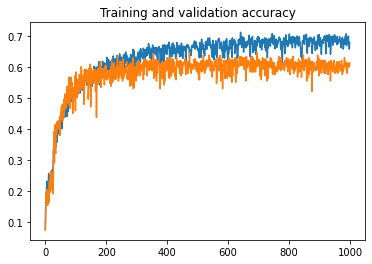

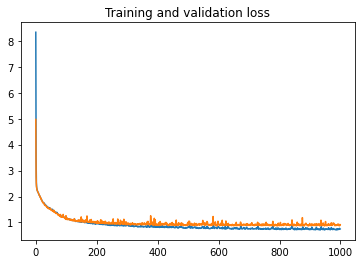

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [23]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.8480545878410339
Test accuracy: 0.6791666746139526


In [24]:
y_pred = model.predict(X_test)
y_pred

array([[2.3723239e-01, 7.8712881e-02, 1.7303037e-12, ..., 2.0727313e-07,
        1.0734015e-15, 6.9890484e-02],
       [5.1907408e-03, 7.2490218e-14, 1.4148599e-24, ..., 9.6957403e-01,
        0.0000000e+00, 1.6296613e-25],
       [1.9609192e-01, 2.7019143e-01, 2.6339421e-15, ..., 2.2614004e-06,
        1.4674012e-17, 2.0872682e-02],
       ...,
       [3.2876824e-06, 4.3997704e-03, 1.3764854e-08, ..., 1.5940503e-21,
        8.3537138e-01, 7.6431246e-03],
       [4.1601509e-01, 7.3817473e-06, 5.2182169e-16, ..., 1.0988907e-01,
        1.0088586e-29, 1.0586973e-14],
       [2.6747778e-01, 3.2792509e-01, 4.8984799e-16, ..., 1.0807881e-05,
        1.0339848e-18, 5.3855591e-03]], dtype=float32)

In [25]:
actual = np.argmax(y_test,axis=1)
predicted = np.argsort(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: \n {predicted[:,7:]}")

Actual: [ 3  9  1 10  6  6  0 10  9  8  0  3  3 10  8  3  9 11  5  8 11 11  1 11
  8  0  0  6  0 10  0  8  7  1  5  8  8  1  6  7 11  1  2  7  7  3  4  8
  2 11  7  6  2  0  8  8  0  0  0  7 11  6  6  8  4  1 10 10  6  1  1  3
  9 11  9 11  2  1  7  7  9  7  6  9  4 11  9  8  4 11  2  8 10  3 11  4
  4  0  7  1  7  9  1  8 11  5  2  6 11  6  9  2  4  5  6  7  3  6  2  5
  6  7  6  4  0  1  2  9  6  2  9 10  4  1  8  2 11  7  0  0  7  4  5  2
  3  4 11  5  6  0  5  0 10  7  5  4 10  5  3  3  2 10  9  1  5  7  1  1
  5  7  9  1  6  1 10  7  2  9  6  1  5 11  3  2 10  1 10  3  7  0 10  2
  4  9  2 11  1  3  3  8  4  3  6  7  9  5  1  1  7 11  8 10  5 10  1  9
 10  2  6  0 11  2  8  5  3  7  4  4  6  3  2  0  3  1  9  4  3 10  0  1]
Predicted: 
 [[11  1  3  0  7]
 [ 5  6  0  3  9]
 [ 8  3  0  1  7]
 ...
 [ 1  8 11  4 10]
 [ 6  9  3  5  0]
 [ 8  3  0  7  1]]
